In [1]:
import cv2
import numpy as np
import random as rng
from matplotlib import pyplot as plt
import text_recognition

In [2]:
color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))

In [47]:
filename = 'images/pan_large.jpg'

In [48]:
img = cv2.imread(filename)
img.shape[::-1]

(3, 2084, 1311)

In [49]:
tmp = cv2.imread('images/templates/logo.jpeg')

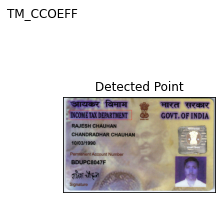

In [50]:
img2 = img.copy()
if tmp.shape[1] > img.shape[1]:
    ratio = img.shape[1]/tmp.shape[1]
    tmp = cv2.resize(tmp, (0,0), fx=ratio, fy=ratio) 
c, w, h = tmp.shape[::-1]

# All the 6 methods for comparison in a list
img = img2.copy()
# Apply template Matching
res = cv2.matchTemplate(img,tmp,cv2.TM_CCOEFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

cv2.rectangle(img,top_left, bottom_right, 255, 2)

plt.subplot(122),plt.imshow(img,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.suptitle('TM_CCOEFF')

plt.show()

(82, 193) (936, 325)


(Text(0.5, 1.0, 'Detected Point'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

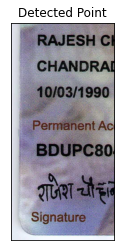

In [51]:
## Crop Image
print(top_left, bottom_right)
l = int(bottom_right[0]/2)
y = bottom_right[1]
nimg = img[y:,0:l]
plt.subplot(122),plt.imshow(nimg,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])


In [52]:
#Apply Thresholding
_, tH = cv2.threshold(nimg, 100, 255, cv2.THRESH_BINARY)

In [53]:
#Apply Bilateral Filter
img = cv2.bilateralFilter(tH,10,85,85)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f8edf175550>,
 <matplotlib.image.AxesImage at 0x7f8edf19b790>)

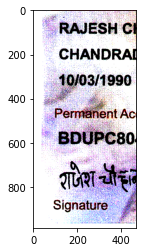

In [54]:
#Apply Dilation
kernel = np.ones((1,1), np.uint8)
dilation = cv2.dilate(img, kernel)
plt.subplot(111),plt.imshow(dilation)

In [55]:
text_recognition.imgToTxt(image = dilation)

[INFO] loading EAST text detector...
5
OCR TEXT


OCR TEXT


OCR TEXT
10/03/1990

OCR TEXT
mbar

OCR TEXT


